In [1]:
import os
import time
import cv2
import object_detection
import video_utils
import matplotlib.pyplot as plt
from mrcnn import visualize
import buffer

# init components
detecter = object_detection.Detection()

Using TensorFlow backend.


Loading detection model......
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [2]:
def output_video(input_name, output_name, alpha):
    '''
    input_name:
    output_name:
    '''
    ROOT_DIR = os.getcwd()
    input_path = os.path.join(ROOT_DIR, "videoinput/", input_name)
    output_path = os.path.join(ROOT_DIR, "videooutput/", output_name)
    decoder = video_utils.VideoDecoder(input_path)
    memory = buffer.Buffer()
    
    # get video info
    total_frames = decoder.get_total_frames()
    FPS = decoder.get_FPS()
    frame = decoder.decode_frame()

    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), FPS, (frame.shape[1], frame.shape[0]))
    start_time = time.time()
    string = 'Stream: 0%'
    mod_value = int(total_frames / 10)
    precent = 0
    for i in range(0, total_frames):
        if i % mod_value == 0:
            print(string)
            precent += 10
            string = string + " => " + str(precent) +"%"
            
        frame = decoder.decode_frame()
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        try:            
            if i % alpha == 0:
                r = detecter.detect_v1(frame)

                # update instructor and bbox
                memory.update_instructor(frame, r['rois'], r['class_ids'], 0.9) #theta
                memory.update_screen(frame, r['rois'], r['class_ids'], 0.85) #beta
            
            # output bbox
            screen_info = memory.top_screen(1)
            instructor_info = memory.top_instructor(2)
            image = visualize.show_image_v1(frame, screen_info, instructor_info)
            out.write(image)

        except AttributeError:
            pass
        
            
    # close everything
    decoder.close()
    out.release()
    cv2.destroyAllWindows()

    # whole time cost
    end_time = time.time()
    interval = (end_time - start_time)/60
    print('{} done! It costs {:.3} m '.format(input_name, interval))
    return memory.instructor_buffer, memory.screen_buffer

In [6]:
video_list = ["muti_people_dynamic_1.mp4","muti_people_dynamic_2.mp4","muti_people_dynamic_3.mp4",
              "muti_people_jump_static_1.mp4","muti_people_jump_static_2.mp4","two_speakers_static.mp4",
              "one_person_cross_static.mp4","one_person_dynamic1.mp4","one_person_dynamic2.mp4",
              "one_person_long_video.mp4","one_person_static.mp4","one_person_static2.mp4",
              "screen_with_face_static.mp4","only_muti_people.mp4","three_people.mp4"]
print(video_list[1:2])

['muti_people_dynamic_2.mp4']


In [8]:
# use input
for name in video_list[1:2]:
    input_name = name
    output_name = name    # The finally video name format likes xxx_f.mp4
    instructor_buffer, screen_buffer = output_video(input_name, output_name, 10)

The video has 315 frames, FPS is 30.
Stream: 0%
Stream: 0% => 10%
Stream: 0% => 10% => 20%
Stream: 0% => 10% => 20% => 30%
Stream: 0% => 10% => 20% => 30% => 40%
Stream: 0% => 10% => 20% => 30% => 40% => 50%
Stream: 0% => 10% => 20% => 30% => 40% => 50% => 60%
Stream: 0% => 10% => 20% => 30% => 40% => 50% => 60% => 70%
Stream: 0% => 10% => 20% => 30% => 40% => 50% => 60% => 70% => 80%
Stream: 0% => 10% => 20% => 30% => 40% => 50% => 60% => 70% => 80% => 90%
Stream: 0% => 10% => 20% => 30% => 40% => 50% => 60% => 70% => 80% => 90% => 100%
muti_people_dynamic_2.mp4 done! It costs 0.175 m 


In [5]:
print(instructor_buffer)            

{'0': [49, array([[[68, 61, 46],
        [67, 60, 45],
        [65, 58, 43],
        ...,
        [32, 29, 28],
        [23, 23, 23],
        [22, 22, 22]],

       [[68, 61, 46],
        [67, 60, 45],
        [65, 58, 43],
        ...,
        [32, 29, 28],
        [23, 23, 23],
        [22, 22, 22]],

       [[68, 61, 46],
        [67, 60, 45],
        [65, 58, 43],
        ...,
        [32, 29, 28],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[15, 18, 16],
        [14, 17, 17],
        [13, 16, 16],
        ...,
        [35, 53, 89],
        [34, 52, 88],
        [30, 48, 84]],

       [[ 6,  7, 12],
        [ 5,  5, 12],
        [ 3,  3, 10],
        ...,
        [34, 55, 93],
        [31, 55, 92],
        [26, 50, 87]],

       [[20, 21, 26],
        [19, 19, 26],
        [17, 17, 24],
        ...,
        [33, 54, 92],
        [28, 52, 89],
        [25, 49, 86]]], dtype=uint8), (51, 0, 255), (407, 1096, 564, 1236)], '1': [2, array([[[39, 39, 30],
        [3

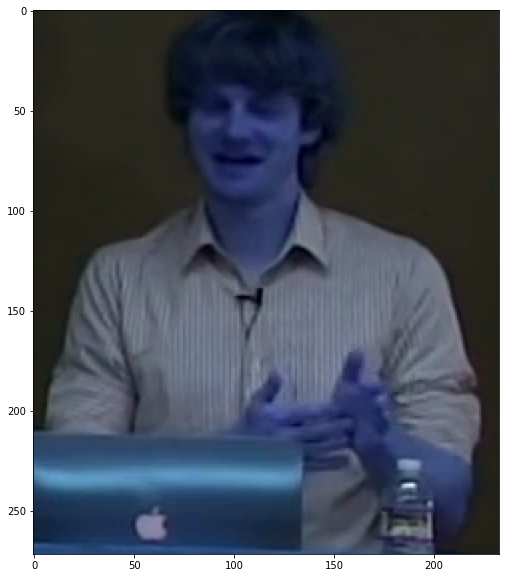

In [6]:
import skimage.io
import matplotlib.pyplot as plt
bbox = (57,53,463,606)
image = instructor_buffer["0"][1]
#image = crop(test, bbox)
plt.figure(figsize=(20,10))
#plt.imsave('221212.jpg', image)
plt.imshow(image)
plt.show()

In [1]:
import buffer
buffer = buffer.Buffer()
color_sets = buffer.color_sets
print(color_sets)

[(255, 153, 0), (51, 255, 0), (51, 0, 255), (255, 0, 153), (255, 0, 0), (204, 255, 0), (0, 102, 255), (0, 255, 255), (0, 255, 102), (204, 0, 255)]


In [5]:
color_index = buffer.color_index
print(color_index)
instructor_buffer = buffer.instructor_buffer
print(instructor_buffer)
screen_buffer = buffer.screen_buffer
print(screen_buffer)

0
{}
{}


In [15]:
result = []
dic = {"a":[1,2,3,4], "b":[5,6,7,8]}
ranking = sorted(dic.items(), key=lambda x: -x[1][0])
for i in range(1):
    result.append([ranking[i][0], ranking[i][1][2], ranking[i][1][3]])
print(result)

[['b', 7, 8]]
